## 인스타그램 크롤링

In [94]:
#인스타그램 계정에 로그인..
from selenium import webdriver

driver=webdriver.Chrome("C:/Users/pc/Main/Data_Analysis/chromedriver_win32/chromedriver.exe")

import time
driver.get("https://www.instagram.com/")
time.sleep(2) #접속한 다음에..2초간 기다리게 함.

email="marc1022@naver.com" #계정정보_id
input_id = driver.find_elements_by_css_selector("input._2hvTZ.pexuQ.zyHYP")[0]
input_id.clear()
input_id.send_keys(email)

password="" #계정정보_password
input_password = driver.find_elements_by_css_selector("input._2hvTZ.pexuQ.zyHYP")[1]
input_password.clear()
input_password.send_keys(password)
input_password.submit()
time.sleep(3)

In [99]:
#인스타그램의 검색 함수
def insta_searching(word):
    url="https://www.instagram.com/explore/tags/"+word
    return url

word="제주도음식"
url=insta_searching(word)
driver.get(url) #검색 결과 페이지 접속

In [100]:
#첫번쨰 게시글을 찾아 클릭하기!
def select_first(driver):
    first=driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

## 본문 내용 가져오기

In [52]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    #현재 소스 코드 가져오기
    html=driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    #본문 내용 가져오기
    try:
        content=soup.select('div.C4VMK>span')[0].text
        content = unicodedata.normalize('NFC',content)
    except:
        content=""
    
    #본문내용에서 해시태그 가져오기(정규표현식 활용)
    try:
        tags=re.findall(r'#[^\s#,\\]+', content)
    except:
        tags=""

    #작성일자 정보
    data = soup.select("time._1o9PC.Nzb55")[0]["datetime"][:10]
    
    #좋아요 수 가져오기
    try:
        like = soup.select("div.Nm9Fw>a.zV_Nj>span")[0].text
    except:
        like=0
        
    #위치 정보가져오기
    try:
        space = soup.select("div.JF9hh")[0].text
        space = unicodedata.normalize('NFC',space)
    except:
        space=""
        
    #수집한 정보 가져오기
    data = [content, like, space, tags, data]
    return data

get_content(driver)

['김혜자 선생님이 차린 국수집이다. 진짜 시장가격 파괴범이다. 옛 가이오국수가 생각나는 집이다. #옛날국수집 #애월맛집 세상 물가 모르는 것 같다. 먹으면서 "이게 어떻게 이 가격이지?"라는 말을 백 번은 넘게 했다. 잔치국수 국물은 멸치육수로 푹 우려내 참 좋다. 잔치국수 국물의 정석 그대로의 맛이다. 비빔국수는 꼬수운 참기름향과 매콤달콤한 소스가 어우러져 젓가락질이 멈추지 않는다. 양도 너무 많아서 면 들다가 젓가락이 부러졌다. 콩국수는 제주산 콩을 활용해 만들었다. 잘게 갈아넣은 콩국물만 먹어도 시원하니 속이 풀린다. 이 맛이면 소금이든 설탕이든 뭘 넣어도 맛있겠다. 꿀팁: 곱빼기 다 먹기 도전 이벤트도 있어서 꿀잼입니다.📍 제주 제주시 애월읍 하귀로 56◾국수 기본 ₩4,000◾곱빼기 ₩8,000*가격은 두 배인데 양은 네 배인 곳.🏷 피웨 부캐 노포 간판 수집가 @nopo__joa🏷 미식가들의 맛집 모음집 @e.a.t.club#잔치국수 #비빔국수 #제주맛집 #제주도맛집 #피그웨이브_제주',
 '3,050',
 'Jeju-do',
 ['#옛날국수집', '#애월맛집', '#잔치국수', '#비빔국수', '#제주맛집', '#제주도맛집', '#피그웨이브_제주'],
 '2021-08-20']

In [54]:
#다음 게시글 열기
def move_next(driver):
    right=driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

## 여러개의 인스타그램 데이터를 가져오기

In [101]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    #현재 소스 코드 가져오기
    html=driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    #본문 내용 가져오기
    try:
        content=soup.select('div.C4VMK>span')[0].text
        content = unicodedata.normalize('NFC',content)
    except:
        content=""
    
    #본문내용에서 해시태그 가져오기(정규표현식 활용)
    try:
        tags=re.findall(r'#[^\s#,\\]+', content)
    except:
        tags=""

    #작성일자 정보
    data = soup.select("time._1o9PC.Nzb55")[0]["datetime"][:10]
    
    #좋아요 수 가져오기
    try:
        like = soup.select("div.Nm9Fw>a.zV_Nj>span")[0].text
    except:
        like=0
        
    #위치 정보가져오기
    try:
        space = soup.select("div.JF9hh")[0].text
        space = unicodedata.normalize('NFC',space)
    except:
        space=""
        
    #수집한 정보 가져오기
    data = [content, like, space, tags, data]
    return data

#비어있는 변수
results=[]
target=100

for i in range(target):
    try:
        result=get_content(driver)
        results.append(result)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

[['넘넘 애정하는 집 앞 제주옥❤️요기는 막창순대와 비빔국수가 진짜 별미예요 🤪제주도 음식점이고 돔베고기랑 몸국도 많이 드시는데요 음식은 진짜 다 맛있어요👍🏻👍🏻저는 이 집 비빔국수를 너무너무 좋아해요 용리단길 맛집이랍니당😊강추드려용 용산맛집 #맛스타그램 #먹스타그램 #제주옥 #먹스타맞팔 #먹팔 #먹팔해요 #용산맛집 #제주도음식 #서울맛집 #신용산맛집 #용산주민 #용리단길 #술스타그램 #소맥스타그램 #술팔 #술팔해요 #좋반 #순대좋아 #막창순대', '183', '제주옥', ['#맛스타그램', '#먹스타그램', '#제주옥', '#먹스타맞팔', '#먹팔', '#먹팔해요', '#용산맛집', '#제주도음식', '#서울맛집', '#신용산맛집', '#용산주민', '#용리단길', '#술스타그램', '#소맥스타그램', '#술팔', '#술팔해요', '#좋반', '#순대좋아', '#막창순대'], '2020-12-03'], ['같은 곳을 바라보며🌇🏘#제주도 #하늘맛집', '2,430', '인그리드', ['#제주도', '#하늘맛집'], '2020-01-04']]


In [102]:
#결과값들은 엑셀파일로 저장!
import pandas as pd
df_results=pd.DataFrame(results)
df_results.columns=["content", "좋아요 수", "장소", "#해시태그", "작성일자"]
df_results.to_excel('C:/Users/pc/Main/Data_Analysis/instagram_jeju_1.xlsx', index=False)

In [104]:
#중복된 값을 제거한 후 통합 저장
jeju_insta_df=pd.DataFrame([])

folder="C:/Users/pc/Main/Data_Analysis/"
f_list=["instagram_jeju.xlsx", "instagram_jeju_1.xlsx"]

for fname in f_list:
    fpath=folder+fname
    temp = pd.read_excel(fpath)
    jeju_insta_df=jeju_insta_df.append(temp)
    
jeju_insta_df.columns=["content", "좋아요 수", "장소", "#해시태그", "작성일자"]
jeju_insta_df.drop_duplicates(subset=["content"], inplace=True)
jeju_insta_df.to_excel('C:/Users/pc/Main/Data_Analysis/instagram_jeju_total.xlsx', index=False)

# 워드 클라우드

수집한 데이터 중 해시태그 정보들을 워드 클라우드로 시각화함

In [108]:
import pandas as pd
raw_data=pd.read_excel('C:/Users/pc/Main/Data_Analysis/instagram_jeju_total.xlsx')
raw_data["#해시태그"][:3]

0    ['#제주분식', '#제주분식⠀간편하게', '#모당모당', '#돔베라면돔베김밥', ...
1    ['#사이카레@saicurry_aewolOPEN', '#사이카레', '#구엄리맛집'...
2    ['#애월맛집', '#제주도맛집', '#제주맛집', '#애월스시', '#제주스시',...
Name: #해시태그, dtype: object

In [109]:
total_tags=[]

for tags in raw_data["#해시태그"]:
    tags_list=tags[2:-2].split(",")
    for tag in tags_list:
        total_tags.append(tag)

In [110]:
#해시태그 출현 빈도 집계
from collections import Counter
tag_counts=Counter(total_tags)

tags_most=tag_counts.most_common(10)
del tags_most[4]

## 시각화하기

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

<AxesSubplot:xlabel='counts', ylabel='tags'>

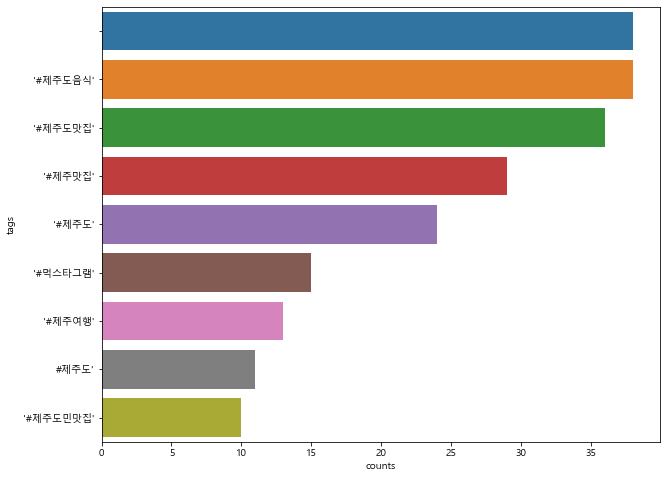

In [112]:
tag_counts_df=pd.DataFrame(tags_most)
tag_counts_df.columns=["tags","counts"]

plt.figure(figsize=(10,8))
sns.barplot(x="counts",y="tags", data=tag_counts_df)

## 워드 클라우드 그리기

In [113]:
from wordcloud import WordCloud
import platform

if platform.system()=="Windows":
    font_path="C:/Windows/Fonts/malgun.ttf"
elif platform.system()=="Darwin":
    font_path="/Users/$USER/Library/Fonts/AppleGothic.ttf"

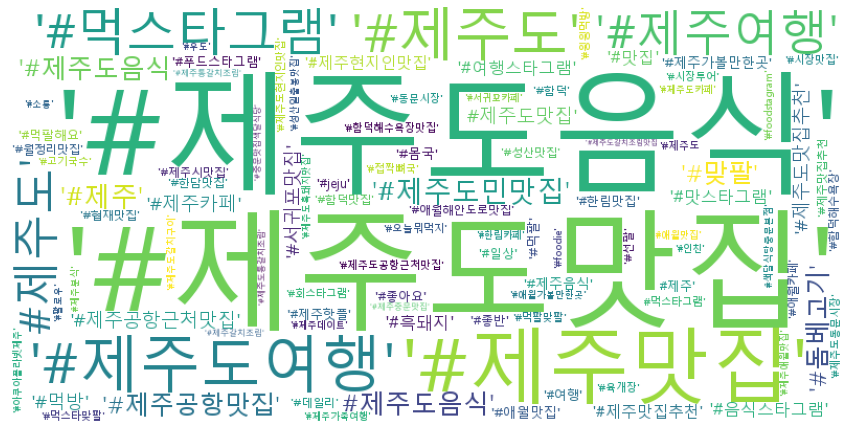

In [114]:
wordcloud=WordCloud(font_path=font_path,
         background_color="white",
         max_words=100,
         relative_scaling=0.3,
         width=800,
         height=400,
         ).generate_from_frequencies(tag_counts)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:/Users/pc/Main/Data_Analysis/jeju_wordcloud.png")

## 지도 시각화

In [105]:
import pandas as pd
raw_total=pd.read_excel("C:/Users/pc/Main/Data_Analysis/instagram_jeju_total.xlsx")
raw_total.head()

,content,좋아요 수,장소,#해시태그,작성일자
0,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,0,NaN,"['#제주분식', '#제주분식⠀간편하게', '#모당모당', '#돔베라면돔베김밥', ...",2021-08-20
1,(협찬)애월바다와 선셋🌅감성까지 더 한스페셜 카레맛집!😋다양한 카레와 토핑들로특별함...,0,NaN,"['#사이카레@saicurry_aewolOPEN', '#사이카레', '#구엄리맛집'...",2021-08-20
2,제주도의 핫이슈!! 예약문의 폭주!! 애월 한라봉스시 스폐셜 메뉴 천국의계단(2-3...,487,제주도 애월읍,"['#애월맛집', '#제주도맛집', '#제주맛집', '#애월스시', '#제주스시',...",2021-08-20
3,광고제주도에서 즐기는 랍스터만찬 랍스터빈 !!🔸주소 : 제주시 애월읍 애월해안로 7...,0,NaN,"['#애월맛집', '#애월카페', '#애월읍맛집', '#제주애월맛집', '#제주도맛...",2021-08-20
4,<광고>#섭지코지맛집 풍족한 #섭지코지한끼 .혼술 혼밥 연인 가족 누가 와도 다 좋...,0,NaN,"['#섭지코지맛집', '#섭지코지한끼', '#섭지코지한끼🍱오픈', '#제주맛집', ...",2021-08-20


In [107]:
location_counts=raw_total["장소"].value_counts()
location_counts.head()

Jeju               10
Jeju-do             8
제주도                 3
스누피가든               3
제주도 Jeju Island     3
Name: 장소, dtype: int64

In [115]:
location_counts_df=pd.DataFrame(location_counts)
location_counts_df.head()

,장소
Jeju,10
Jeju-do,8
제주도,3
스누피가든,3
제주도 Jeju Island,3


In [116]:
location_counts_df.to_excel("C:/Users/pc/Main/Data_Analysis/location_counts.xlsx")

In [118]:
#위치정보만 선택하여 변수에 저장
locations=list(location_counts.index)

## 카카오 API를 활용한 장소 검색

In [135]:
import requests

searching="합정 스타벅스"
url = "https://dapi.kakao.com//v2/local/search/keyword.json?query={}".format(searching)

headers={
    "Authorization":"KakaoAK 카카오 API키 입력"
}
places = requests.get(url, headers= headers).json()["documents"]

In [131]:
#장소 검색을 함수로 정의함

def find_places(searching):
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(searching)

    headers={
    "Authorization":"KakaoAK "
    }
    places = requests.get(url, headers= headers).json()["documents"]
    
    #필요한 정보 선택하기
    place = places[0] #첫번쨰 정보
    #이름과 위도 경도의 정보만 추출함
    name = place["place_name"]
    x=place["x"]
    y = place["y"]
    data=[name, x, y, searching]
    
    return data

In [130]:
find_places("제주공항")

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [136]:
import time
location_inform=[]
for location in locations:
    try:
        data = find_places(location)
        location_inform.append(data)
        time.sleep(0.5)
    except:
        pass

#위치정보들 저장
location_inform_df=pd.DataFrame(location_inform)
location_inform_df.columns=["네이버위치명","경도","위도","인스타위치명"]
location_inform_df.to_excel("C:/Users/pc/Main/Data_Analysis/location_inform.xlsx", index=False)

In [2]:
import pandas as pd
location_inform_df=pd.read_excel("C:/Users/pc/Main/Data_Analysis/location_inform.xlsx")
location_counts_df=pd.read_excel("C:/Users/pc/Main/Data_Analysis/location_counts.xlsx", index_col=0)

In [3]:
#위치데이터 병합

location_data = pd.merge(location_inform_df, location_counts_df, how="inner", left_on='네이버위치명', right_index=True)
location_data.head()

,네이버위치명,경도,위도,인스타위치명,장소
1,제주도,126.545874,33.379778,제주도,3
3,제주도,126.545874,33.379778,제주도 Jeju Island,3
2,스누피가든,126.778444,33.443963,스누피가든,3
5,몰마농,126.915645,33.433980,몰마농,2
8,신설오름,126.541561,33.505419,신설오름,2


In [4]:
#중복데이터 제거
location_data["네이버위치명"].value_counts()

제주도           2
스누피가든         1
몰마농           1
신설오름          1
오라방 신사점       1
용이식당          1
부두식당          1
벵디            1
도두해녀의집        1
오드랑베이커리       1
곽지해수욕장        1
연돈            1
은희네해장국 노형점    1
제주옥           1
인그리드          1
제주집           1
Name: 네이버위치명, dtype: int64

In [5]:
#칼럼 값이 동일한 경우, place값을 병합하도록 수정함
location_data=location_data.pivot_table(
    index=["네이버위치명","경도","위도"],
    values="장소",
    aggfunc="sum")
location_data

,,,장소
네이버위치명,경도,위도,
곽지해수욕장,126.304673,33.450658,1
도두해녀의집,126.466635,33.506183,1
몰마농,126.915645,33.433980,2
벵디,126.837170,33.537720,1
부두식당,126.251007,33.218926,1
스누피가든,126.778444,33.443963,3
신설오름,126.541561,33.505419,2
연돈,126.407158,33.258895,1
오드랑베이커리,126.671581,33.542134,1


In [6]:
#병합한 데이터 저장
location_data.to_excel("C:/Users/pc/Main/Data_Analysis/location_data_1.xlsx")

## folium을 이용한 지도 시각화 - 개별표기

In [7]:
location_1=pd.read_excel("C:/Users/pc/Main/Data_Analysis/location_data_1.xlsx")
location_1

,네이버위치명,경도,위도,장소
0,곽지해수욕장,126.304673,33.450658,1
1,도두해녀의집,126.466635,33.506183,1
2,몰마농,126.915645,33.433980,2
3,벵디,126.837170,33.537720,1
4,부두식당,126.251007,33.218926,1
5,스누피가든,126.778444,33.443963,3
6,신설오름,126.541561,33.505419,2
7,연돈,126.407158,33.258895,1
8,오드랑베이커리,126.671581,33.542134,1
9,오라방 신사점,127.023722,37.521098,2


In [10]:
import folium

Mt_hanla = [33.362500,126.533694] #한라산 위도, 경도로 찍어서..제주도 맵을 중심으로 잡음.
map_jeju=folium.Map(location=Mt_hanla, zoom_start=11) #지도 생성

for i in range(len(location_1)):
    name=location_1["네이버위치명"][i]
    count=location_1["장소"][i]
    size=int(count)*8 #장소 횟수가 많을 수록 size가 커짐....
    long=location_1["위도"][i]
    lat=location_1["경도"][i]
    folium.CircleMarker((long, lat), radius=size, color="red", popup=name).add_to(map_jeju) #지도에 뿌리기
    
map_jeju

In [193]:
map_jeju.save("C:/Users/pc/Main/Data_Analysis/location_data.html")

## folium을 이용한 지도 시각화- 그룹으로 표시하기

In [16]:
from folium.plugins import MarkerCluster

locations=[]
names=[]

for i in range(len(location_1)):
    data = location_1.iloc[i] #행하나씩...
    locations.append((float(data["위도"]), float(data["경도"])))
    names.append(data["네이버위치명"])
    
#지도 생성
Mt_hanla = [33.362500,126.533694] #한라산 위도, 경도로 찍어서..제주도 맵을 중심으로 잡음.
map_jeju2=folium.Map(location=Mt_hanla, zoom_start=11) #지도 생성

marker_cluster=MarkerCluster(locations=locations, popups=names, name="Jeju",overlay=True, control=True)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [12]:
map_jeju2.save("C:/Users/pc/Main/Data_Analysis/map_jeju2.html")

## 특정 단어를 포함하는 게시글 찾기

In [19]:
import pandas as pd

raw_total=pd.read_excel("C:/Users/pc/Main/Data_Analysis/instagram_jeju_total.xlsx")
raw_total.head(3)

,content,좋아요 수,장소,#해시태그,작성일자
0,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,0,NaN,"['#제주분식', '#제주분식⠀간편하게', '#모당모당', '#돔베라면돔베김밥', ...",2021-08-20
1,(협찬)애월바다와 선셋🌅감성까지 더 한스페셜 카레맛집!😋다양한 카레와 토핑들로특별함...,0,NaN,"['#사이카레@saicurry_aewolOPEN', '#사이카레', '#구엄리맛집'...",2021-08-20
2,제주도의 핫이슈!! 예약문의 폭주!! 애월 한라봉스시 스폐셜 메뉴 천국의계단(2-3...,487,제주도 애월읍,"['#애월맛집', '#제주도맛집', '#제주맛집', '#애월스시', '#제주스시',...",2021-08-20


In [28]:
#원하는 단어를 포함하는 게시글 찾기

select_word = "관광"
check_list=[]

for content in raw_total["content"]:
    if select_word in content:
        check_list.append(True) #넣겠따..
    else:
        check_list.append(False)

select_df = raw_total[check_list] #True에 해당하는 것만 추출함
select_df.head()

,content,좋아요 수,장소,#해시태그,작성일자
5,".❤ 중문 ""한마음정육식당"" ❤낭만적인 글램핑 분위기 물~씬 더해진루프탑 바베큐 맛...","1,628",NaN,"['#중문맛집', '#제주고기집', '#중문핫플레이스', '#제주맛집', '#제주도...",2021-08-20
16,"함덕 제주 흑돼지무한리필 고깃집 흑백돈흑돼지 오겹살, 특수부위도 있음 !!현지인들과...",0,NaN,"['#제주함덕맛집', '#함덕', '#함덕맛집', '#함덕흑돼지무한리필', '#함덕...",2021-08-21
66,"#제주도음식#종달수다뜰바다, 오름, 들판이 조화롭게 어우러진 올레1코스에 위치한 곳...",381,NaN,"['#제주도음식', '#종달수다뜰바다', '#제주음식점', '#제주도음식점']",2021-08-18
106,접짝뼈국..오랜만이네..진짜 추억의 맛인데..여기까지 관광객이 오고 있다는거에 깜놀...,21,NaN,"['#제주도관광', '#제주도음식', '#접짝뼈국', '#친절함', '#제주도의맛'...",2021-07-28


In [29]:
#선택한 데이터 확인

for i in select_df.index:
    print(select_df.loc[i, "content"])
    print("-"*100)
    
select_df.head()

.❤ 중문 "한마음정육식당" ❤낭만적인 글램핑 분위기 물~씬 더해진루프탑 바베큐 맛집 알려드림🙋‍캠핑st지만 이것저것 준비할 필요❌없.음❌ 몸만 가서 편하~게 맛보면 된다구👀제주바다와 산이 보이는 루프탑에서감성충전하면서 고기뜯으면 ㄹㅇ행복🌼코시국에 딱 알맞게 개별텐트에서안전하게 바베큐 즐길수있음❣핵츄천~@@친구얌 나 여기데려가줘✅제주 서귀포시 중문관광로 288✅064-738-1208✅@hmu_jeju288#중문맛집 #제주고기집 #중문핫플레이스 #제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월카페 #제주공항맛집 #제주도카페 #제주카페 #서귀포맛집 #서귀포카페 #산방산맛집
----------------------------------------------------------------------------------------------------
함덕 제주 흑돼지무한리필 고깃집 흑백돈흑돼지 오겹살, 특수부위도 있음 !!현지인들과 관광객들이 자주 찾는 함덕 흑돼지 맛집고기 먹는동안 무한리필 가능 흐름 안 끊켜서 너무 좋음 ㅎㅎ연탄불에 구워 먹는 제주흑돼지 존맛탱 !!계란찜은 서비스 !!위치 : 소노벨 앞(구대명리조트 앞)주차장 : 가게 뒷쪽배달 / 포장 : 배달의 민족, 요기요#제주함덕맛집 #함덕 #함덕맛집 #함덕흑돼지무한리필 #함덕흑돼지 #함덕해수욕장 #함덕해변 #소노벨근처맛집 #함덕해수욕장맛집 #함덕무한리필 #함덕존맛 #함덕특수부위 #함덕흑돼지맛집 #흑백돈 #함덕맛집추천 #함덕현지인맛집 #제주도핫플 #제주맛집 #제주도맛집 #제주도현지인맛집 #현지인맛집 #제주핫플 #함덕포장 #함덕흑돼지포장
----------------------------------------------------------------------------------------------------
#제주도음식#종달수다뜰바다, 오름, 들판이 조화롭게 어우러진 올레1코스에 위치한 곳으로 제주에서 꼭 먹어야할 갈치, 성게, 전복등 각종 제주 해산물 요리가 제공되는 곳입니다.농림축산식품

,content,좋아요 수,장소,#해시태그,작성일자
5,".❤ 중문 ""한마음정육식당"" ❤낭만적인 글램핑 분위기 물~씬 더해진루프탑 바베큐 맛...","1,628",NaN,"['#중문맛집', '#제주고기집', '#중문핫플레이스', '#제주맛집', '#제주도...",2021-08-20
16,"함덕 제주 흑돼지무한리필 고깃집 흑백돈흑돼지 오겹살, 특수부위도 있음 !!현지인들과...",0,NaN,"['#제주함덕맛집', '#함덕', '#함덕맛집', '#함덕흑돼지무한리필', '#함덕...",2021-08-21
66,"#제주도음식#종달수다뜰바다, 오름, 들판이 조화롭게 어우러진 올레1코스에 위치한 곳...",381,NaN,"['#제주도음식', '#종달수다뜰바다', '#제주음식점', '#제주도음식점']",2021-08-18
106,접짝뼈국..오랜만이네..진짜 추억의 맛인데..여기까지 관광객이 오고 있다는거에 깜놀...,21,NaN,"['#제주도관광', '#제주도음식', '#접짝뼈국', '#친절함', '#제주도의맛'...",2021-07-28


In [31]:
## 여러개의 단어 추출하여 사용하기

select_words = ["관광", "추억"]

for select_word in select_words:
    check_list=[]
    for content in raw_total["content"]:
        if select_word in content:
            check_list.append(True) #넣겠따..
        else:
            check_list.append(False)

    select_df = raw_total[check_list] #True에 해당하는 것만 추출함
    fpath = f'C:/Users/pc/Main/Data_Analysis/select_word_{select_word}.xlsx'
    select_df.to_excel(fpath)